Kayla Wilkins
MIS 545 01

In [47]:
# Load any packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression # linear regression
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [48]:
# Build fake data
# Set a random seed for reproducibility
np.random.seed(42)

# Generate X values
X = np.linspace(0, 10, 100)

# Create a linear relationship with Y and add some noise
slope = 2.5
intercept = 5
noise = np.random.normal(0, 4, 100)  # Simulate noise
Y = slope * X + intercept + noise

# Create a DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Save the DataFrame to a CSV file
df.to_csv('linear_regression_data.csv', index=False)

In [49]:
# The next few code blocks will be for exploratory data analysis and performing a linear regression on the data created above
# Display the first five records of df
print(df.head(5))

         X          Y
0  0.00000   6.986857
1  0.10101   4.699468
2  0.20202   8.095805
3  0.30303  11.849695
4  0.40404   5.073488


In [50]:
# Display the structure of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


In [51]:
# Display summary statistics of df
print(df.describe())

                X           Y
count  100.000000  100.000000
mean     5.000000   17.084614
std      2.930454    8.320912
min      0.000000    0.629707
25%      2.500000    9.795100
50%      5.000000   16.284842
75%      7.500000   24.172596
max     10.000000   31.854378


array([[<Axes: title={'center': 'Y'}>]], dtype=object)

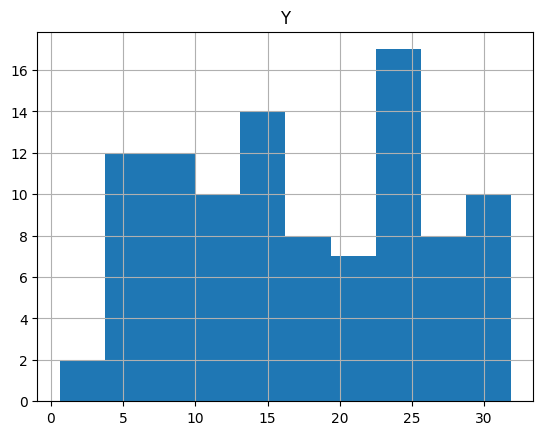

In [52]:
# Display a histogram of column Y in df
df.hist(column = "Y")

In [53]:
# Generate the linear regression model and save it in an object called dfModel
dfModel = smf.ols('Y ~ X', data = df).fit()

In [54]:
# Display the beta coefficients for the model
print(dfModel.params)

Intercept    4.308749
X            2.555173
dtype: float64


In [55]:
# Display the linear regression model results summary
print(dfModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     417.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.30e-37
Time:                        23:41:54   Log-Likelihood:                -270.29
No. Observations:                 100   AIC:                             544.6
Df Residuals:                      98   BIC:                             549.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3087      0.724      5.951      0.0

In [56]:
# Create new data, perform exploratory data analysis, and make a decision tree based on the data
# Set a random seed for reproducibility
np.random.seed(42)

# Create a dataset with 100 rows
data = {
    'Age': np.random.randint(18, 65, 100),
    'Income': np.random.uniform(30000, 100000, 100),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=100),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed'], size=100),
    'Health_Condition': np.random.choice(['Excellent', 'Good', 'Fair', 'Poor'], size=100),
    'Decision': np.random.choice(['Yes', 'No'], size=100)
}

# Create a DataFrame
applicant_records = pd.DataFrame(data)

# Save the DataFrame to a CSV file
applicant_records.to_csv('decision_tree_data.csv', index=False)

In [57]:
# Display the first few rows of the DataFrame
print(applicant_records.head())

   Age        Income Education Employment_Status Health_Condition Decision
0   56  50544.172230  Bachelor        Unemployed             Good      Yes
1   46  30985.587590    Master        Unemployed        Excellent       No
2   32  43918.968286    Master          Employed             Poor      Yes
3   60  79793.936692    Master          Employed        Excellent      Yes
4   25  85312.287837       PhD        Unemployed             Poor      Yes


In [58]:
# Display the data types of each column
print(applicant_records.dtypes)

Age                    int64
Income               float64
Education             object
Employment_Status     object
Health_Condition      object
Decision              object
dtype: object


In [59]:
# Apply label encoding to categorical columns
applicant_records['Education'] = applicant_records['Education'].astype('category').cat.codes
applicant_records['Employment_Status'] = applicant_records['Employment_Status'].astype('category').cat.codes
applicant_records['Health_Condition'] = applicant_records['Health_Condition'].astype('category').cat.codes
applicant_records['Decision'] = applicant_records['Decision'].astype('category').cat.codes

In [60]:
# Split dataset into features named feature_cols and target variables into X and y. Use label as the target variable.
feature_cols = ['Age', 'Income', 'Education', 'Health_Condition','Employment_Status']
X = applicant_records[feature_cols] # Features
y = applicant_records.Decision # Target variable

In [61]:
# Split dataset into 70% training set and 30% test set. Put the results into variables named X_train, X_test, y_train, y_test.
# Label your variables X_train, X_test, y_train, y_test. Use a random_state value of 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Create Decision Tree classifer object named clf using the gini criterion
clf = DecisionTreeClassifier(criterion="gini", random_state=1)

In [63]:
# Train the decision tree classifer using the X_train and y_train variables.
clf = clf.fit(X_train,y_train)

In [64]:
# Predict the response for test dataset and store it in a variable named y_pred
y_pred = clf.predict(X_test)

In [65]:
# Display the Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [66]:
# Create a new Decision Tree classifier object names clf using the entropy criterion and a max depth of 3.
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)

In [67]:
# Train Decision Tree Classifier using the training data
clf = clf.fit(X_train,y_train)

In [68]:
# Predict the response for test dataset and place the result in y_pred
y_pred = clf.predict(X_test)

In [69]:
#  Display the Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3
